importing all the libraries we use.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

We use this plotImages() function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook.

In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

We define this variable called gen as an ImageDataGenerator. All the parameters being passed are the different ways we're telling Keras to augment the image.

In [4]:
gen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

We choose a random image of a person from the file and print that person's name and path.

In [5]:
import os, random

base_dir = r"C:/Users/ibrahim/OneDrive/Desktop/archive/lfw-deepfunneled/lfw-deepfunneled"

chosen_person = random.choice(os.listdir(base_dir))
person_path = os.path.join(base_dir, chosen_person)

chosen_image = random.choice(os.listdir(person_path))
image_path = os.path.join(person_path, chosen_image)

print("Person:", chosen_person)
print("Image path:", image_path)


Person: Grady_Irvin_Jr
Image path: C:/Users/ibrahim/OneDrive/Desktop/archive/lfw-deepfunneled/lfw-deepfunneled\Grady_Irvin_Jr\Grady_Irvin_Jr_0001.jpg


We obtain the image by reading it from the file using plt.imread(image_path). We then expand its dimensions to make it compatible with later use, and plot it to visualize the original image.

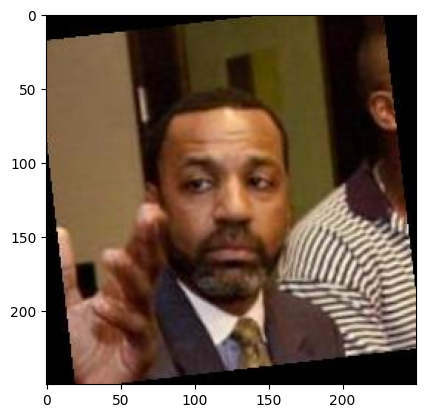

In [6]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

We generate batches of augmented images from the original image.
The flow() function takes NumPy data and generates batches of augmented data.
We get ten samples of the augmented images and plot them.

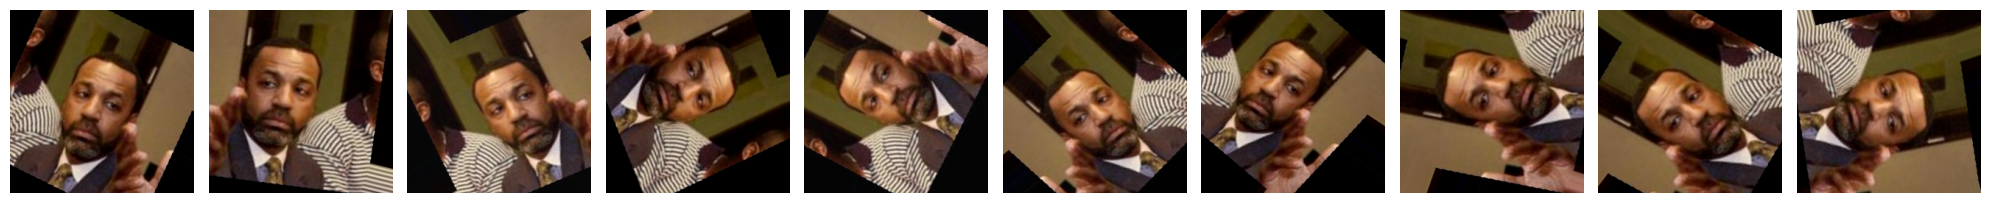

In [7]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)


Now we create a new folder to save the augmented images with the prefix aug_image_, and then print the path.

In [9]:
save_dir = os.path.join("augmented", chosen_person)
os.makedirs(save_dir, exist_ok=True)

aug_iter = gen.flow(
    image, 
    save_to_dir=save_dir,        
    save_prefix='aug-image-',  
    save_format='jpeg'            
)
print("the path :", os.path.abspath(save_dir))

the path : c:\Users\ibrahim\OneDrive\Desktop\augmented\Grady_Irvin_Jr
